In [116]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import scipy
%matplotlib inline
from brian2.units import *
plt.viridis()
from matplotlib import animation, rc
from IPython.display import HTML
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [117]:
import matplotlib as mlib
mlib.rcParams.update({'font.size': 22})
mlib.rcParams.update({'errorbar.capsize': 2})

In [210]:
# Case 1
# data = np.load("D:/Work/Neurogenesis-PhD/synaptogenesis/mnist_topographic_map_results_144234_23012018.npz") # inh lat f_rew = 1khz
# data = np.load("D:/Work/Neurogenesis-PhD/synaptogenesis/mnist_topographic_map_results_154256_23012018.npz") # f_mean = 10
# Case 2
# data = np.load("D:/Work/Neurogenesis-PhD/synaptogenesis/case_2_mnist_training.npz")
# Case 3
data = np.load("D:/Work/Neurogenesis-PhD/synaptogenesis/case_3_mnist.npz")
    
simtime = data['simtime'].ravel()[0]
from pprint import pprint as pp
pp(data['sim_params'].ravel()[0])

{'a_minus': 0.24,
 'a_plus': 0.1,
 'b': 1.2,
 'case': 3,
 'cell_params': {'cm': 20.0,
                 'e_rev_E': 0.0,
                 'e_rev_I': -80.0,
                 'i_offset': 0.0,
                 'tau_m': 20.0,
                 'tau_refrac': 5.0,
                 'tau_syn_E': 5.0,
                 'tau_syn_I': 15.0,
                 'v_reset': -70.0,
                 'v_rest': -70.0,
                 'v_thresh': -50.0},
 'delay': 1,
 'f_base': 5,
 'f_peak': 60,
 'f_rew': 10000,
 'g_max': 0.2,
 'grid': array([28, 28]),
 'input_type': 1,
 'lateral_inhibition': 1,
 'lesion': 0,
 'p_elim_dep': 0.0245,
 'p_elim_pot': 0.00013600000000000003,
 'p_form_forward': 0.16,
 'p_form_lateral': 1,
 'random_partner': False,
 's_max': 32,
 'sigma_form_forward': 2.5,
 'sigma_form_lateral': 1,
 'sigma_stim': 2,
 'simtime': 300000,
 't_minus': 10.0,
 't_plus': 20.0,
 't_record': 300000,
 't_stim': 200,
 'tau_refrac': 5.0}


In [219]:
final_ff_conn = data['ff_connections'][-10:]
final_lat_conn = data['lat_connections'][-10:]
print final_ff_conn.shape
print final_lat_conn.shape

(10L,)
(10L,)


In [212]:
final_ff_conn[0].shape

(13573L, 4L)

In [213]:
conn_list = final_ff_conn[6]

In [214]:
source_hits = np.empty(28**2)
source_weighted_hits = np.empty(28**2)
for i in range(28**2):
    source_hits[i] = np.count_nonzero(conn_list[:, 0]==i)
#     print conn_list[conn_list[:, 0]==i]
    source_weighted_hits[i] = np.sum(conn_list[conn_list[:, 0]==i, 2])

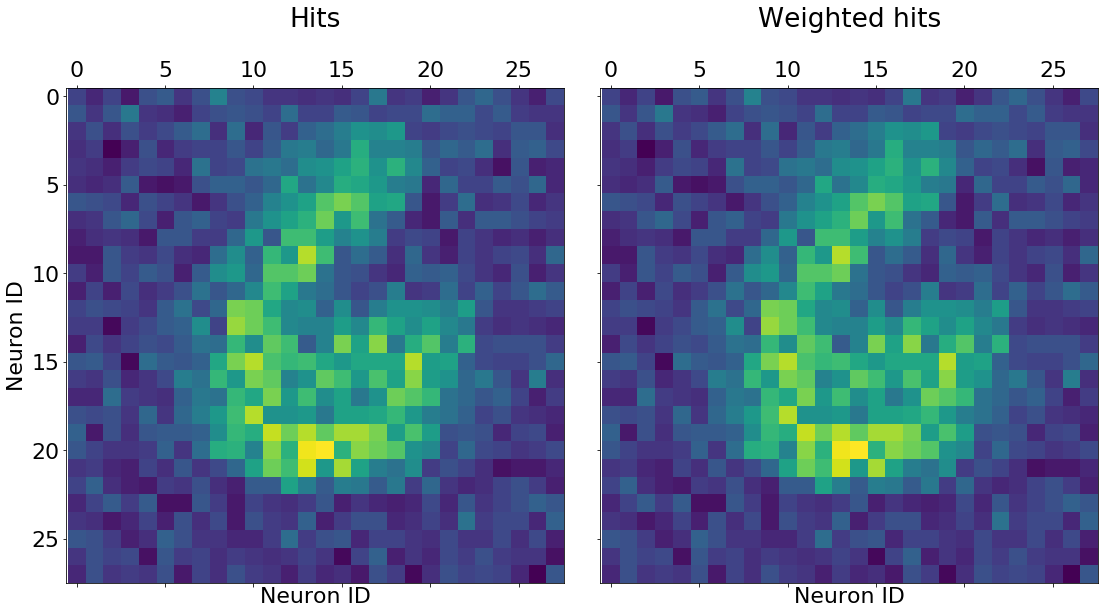

In [215]:
fig_conn, (ax1, ax2) = plt.subplots(1, 2,figsize=(16,9), dpi=800, sharey=True)
    

ff_conn_ax = ax1.matshow(source_hits.reshape(28, 28))
weighted_conn_ax = ax2.matshow(source_weighted_hits.reshape(28, 28))

ax1.set_title("Hits\n")
ax1.set_xlabel("Neuron ID")
ax1.set_ylabel("Neuron ID")
ax2.set_title("Weighted hits\n")
ax2.set_xlabel("Neuron ID")
# ax2.set_ylabel("Neuron ID")

plt.tight_layout()

# divider = make_axes_locatable(plt.gca())
# cax = divider.append_axes("right", "5%", pad="3%")
# cbar = plt.colorbar(i, cax=cax)
# cbar.set_label("Number of hits", fontsize=14)
plt.show()

[ 12.59692383] [ 0.59985352]


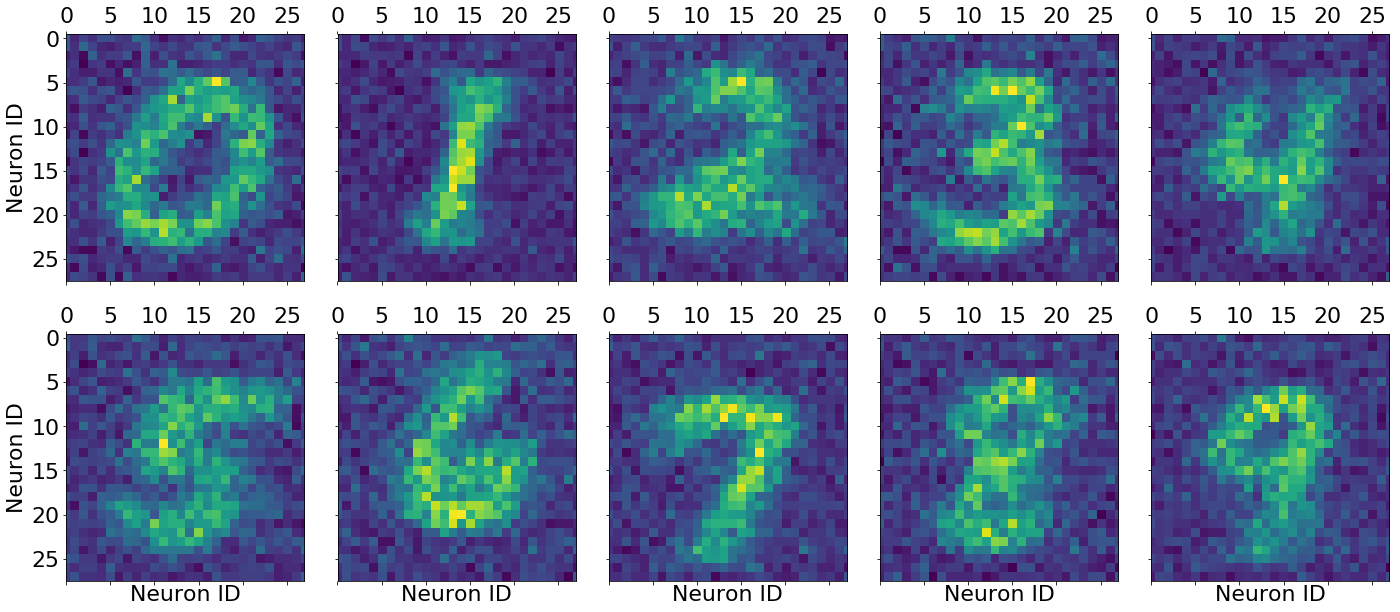

In [216]:
fig_conn, axes = plt.subplots(2, 5,figsize=(20, 9), dpi=800, sharey=True)

silly_ax = []
maximus = [-1]
minimus = [2**31]

for index, val in np.ndenumerate(axes):
    x, y = index
    source_weighted_hits = np.empty(28**2)
    conn_list = final_ff_conn[x*5+y]
    for i in range(28**2):
        source_weighted_hits[i] = np.sum(conn_list[conn_list[:, 0]==i, 2])
    maximus = np.maximum(maximus, source_weighted_hits.max())
    minimus = np.minimum(minimus, source_weighted_hits.min())

    silly_ax.append(axes[x, y].matshow(source_weighted_hits.reshape(28, 28)))

# ff_conn_ax = axes[0, 0].matshow(source_hits.reshape(28, 28))
# weighted_conn_ax = axes[1, 1].matshow(source_weighted_hits.reshape(28, 28))
print maximus, minimus

# ax1.set_title("Hits\n")
# ax1.set_xlabel("Neuron ID")
axes[0, 0].set_ylabel("Neuron ID")
# ax2.set_title("Weighted hits\n")
# ax2.set_xlabel("Neuron ID")
axes[1, 0].set_ylabel("Neuron ID")

for arg in range(5):
    axes[1, arg].set_xlabel("Neuron ID")
    

# fig_conn.subplots_adjust(right=0.8)
# cbar_ax = fig_conn.add_axes([0.85, 0.15, 0.05, 0.7])
# fig_conn.colorbar(silly_ax[4], cax=cbar_ax)

# from mpl_toolkits.axes_grid1 import make_axes_locatable
# divider = make_axes_locatable(plt.gca())
# cax = divider.append_axes("right", "5%", pad="3%")
# plt.colorbar(silly_ax[4], cax=cax)

plt.tight_layout()
plt.savefig("all_digits_weighted.png", dpi=800)
plt.savefig("all_digits_weighted.svg", dpi=800)
plt.show()

[ 63.] [ 3.]


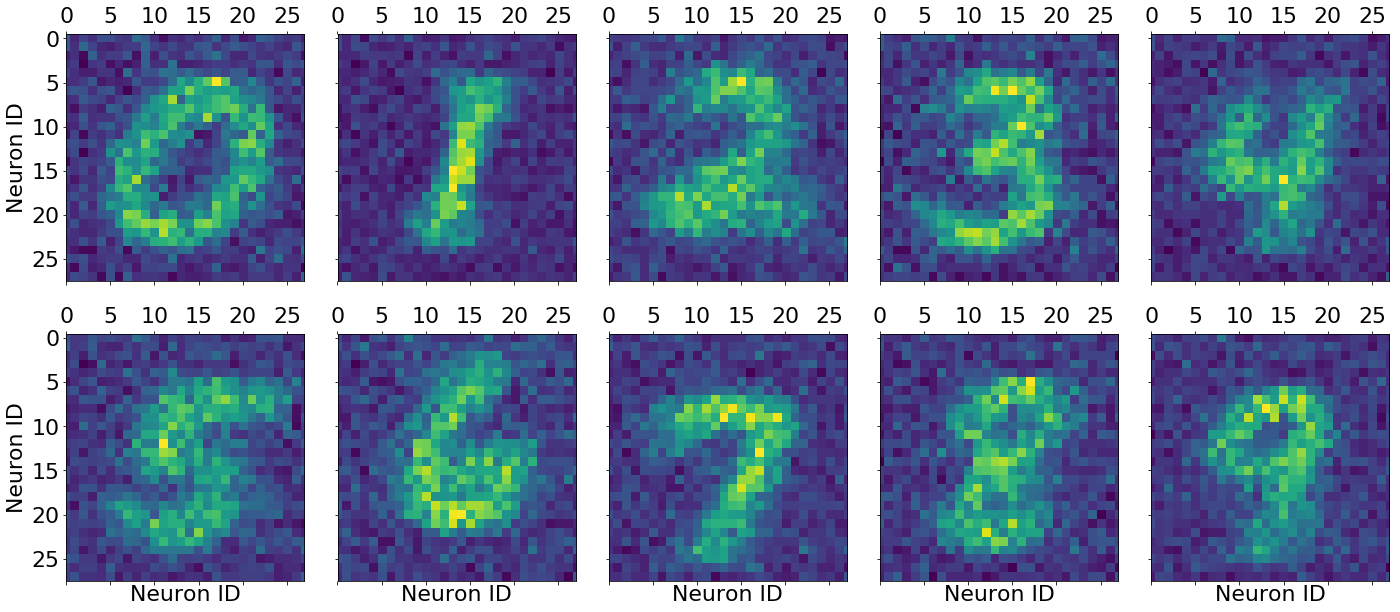

In [217]:
fig_conn, axes = plt.subplots(2, 5,figsize=(20, 9), dpi=800, sharey=True)

silly_ax = []
maximus = [-1]
minimus = [2**31]

for index, val in np.ndenumerate(axes):
    x, y = index
    source_weighted_hits = np.empty(28**2)
    conn_list = final_ff_conn[x*5+y]
    for i in range(28**2):
        source_hits[i] = np.count_nonzero(conn_list[:, 0]==i)
    maximus = np.maximum(maximus, source_hits.max())
    minimus = np.minimum(minimus, source_hits.min())

    silly_ax.append(axes[x, y].matshow(source_hits.reshape(28, 28)))

# ff_conn_ax = axes[0, 0].matshow(source_hits.reshape(28, 28))
# weighted_conn_ax = axes[1, 1].matshow(source_weighted_hits.reshape(28, 28))
print maximus, minimus

# ax1.set_title("Hits\n")
# ax1.set_xlabel("Neuron ID")
axes[0, 0].set_ylabel("Neuron ID")
# ax2.set_title("Weighted hits\n")
# ax2.set_xlabel("Neuron ID")
axes[1, 0].set_ylabel("Neuron ID")

for arg in range(5):
    axes[1, arg].set_xlabel("Neuron ID")
    

# fig_conn.subplots_adjust(right=0.8)
# cbar_ax = fig_conn.add_axes([0.85, 0.15, 0.05, 0.7])
# fig_conn.colorbar(silly_ax[4], cax=cbar_ax)

# from mpl_toolkits.axes_grid1 import make_axes_locatable
# divider = make_axes_locatable(plt.gca())
# cax = divider.append_axes("right", "5%", pad="3%")
# plt.colorbar(silly_ax[4], cax=cax)

plt.tight_layout()
plt.savefig("all_digits.png", dpi=800)
plt.savefig("all_digits.svg", dpi=800)
plt.show()

In [218]:
fan_ins_per_number = []
for index, val in np.ndenumerate(axes):
    x, y = index
    weighted_fan_in = np.empty(28**2)
    fan_in =  np.empty(28**2)
    lat_weighted_fan_in = np.empty(28**2)
    lat_fan_in =  np.empty(28**2)
    
    conn_list = final_ff_conn[x*5+y]
    lat_conn_list = final_lat_conn[x*5+y]
    for i in range(28**2):
        fan_in[i] = np.count_nonzero(conn_list[:, 1]==i)
        weighted_fan_in[i] = np.sum(conn_list[conn_list[:, 1]==i, 2])
        lat_fan_in[i] = np.count_nonzero(lat_conn_list[:, 1]==i)
        lat_weighted_fan_in[i] = np.sum(lat_conn_list[lat_conn_list[:, 1]==i, 2])
    fan_ins_per_number.append((fan_in, weighted_fan_in, lat_fan_in, lat_weighted_fan_in))

In [184]:
fan_ins_per_number = np.asarray(fan_ins_per_number)

In [185]:
print np.mean(fan_ins_per_number[0][0])
print np.mean(fan_ins_per_number[0][1])
print np.mean(fan_ins_per_number[0][2])
print np.mean(fan_ins_per_number[0][3])

17.3125
3.46165466309
9.36734693878
1.87527185557


In [199]:
for number_id in range(10):
    print "{:25s}".format("Average ff fan_in for "), number_id, "is", np.mean(fan_ins_per_number[number_id][0])
    print "{:25s}".format("Average lat fan_in for "), number_id, "is", np.mean(fan_ins_per_number[number_id][2])
    print "{:25s}".format("Total ff conn for "), number_id, "is", np.sum(fan_ins_per_number[number_id, 0])
    print "{:25s}".format("Connectivity percentage (FF)"), number_id, "is",  (np.sum(fan_ins_per_number[number_id, 0])*100.) / (28**4)
    print "{:25s}".format("Total lat conn for "), number_id, "is", np.sum(fan_ins_per_number[number_id, 2])
    print "{:25s}".format("TOTAL conn for "), number_id, "is", np.sum(fan_ins_per_number[number_id, 2]) + np.sum(fan_ins_per_number[number_id, 0])
    print "{:25s}".format("Connectivity percentage "), number_id, "is",  ((np.sum(fan_ins_per_number[number_id, 0])+ np.sum(fan_ins_per_number[number_id, 2]))*100.) / (28**4*2)
    print

Average ff fan_in for     0 is 17.3125
Average lat fan_in for    0 is 9.36734693878
Total ff conn for         0 is 13573.0
Connectivity percentage (FF) 0 is 2.20822704082
Total lat conn for        0 is 7344.0
TOTAL conn for            0 is 20917.0
Connectivity percentage   0 is 1.70152085069

Average ff fan_in for     1 is 15.6301020408
Average lat fan_in for    1 is 10.1517857143
Total ff conn for         1 is 12254.0
Connectivity percentage (FF) 1 is 1.99363546439
Total lat conn for        1 is 7959.0
TOTAL conn for            1 is 20213.0
Connectivity percentage   1 is 1.64425304561

Average ff fan_in for     2 is 17.1581632653
Average lat fan_in for    2 is 9.35076530612
Total ff conn for         2 is 13452.0
Connectivity percentage (FF) 2 is 2.18854123282
Total lat conn for        2 is 7331.0
TOTAL conn for            2 is 20783.0
Connectivity percentage   2 is 1.69062044461

Average ff fan_in for     3 is 16.8354591837
Average lat fan_in for    3 is 9.48596938776
Total ff conn fo

In [220]:
print testing_data['testing_numbers']

[2 6 3 ..., 7 0 7]


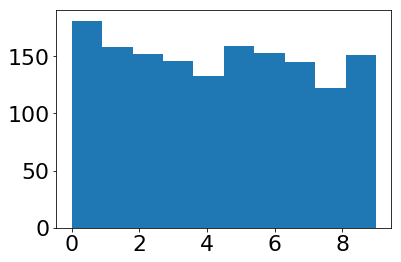

In [221]:
plt.hist(testing_data['testing_numbers'])
plt.show()

In [222]:
post_spikes = testing_data['post_spikes']

In [223]:
assert post_spikes.shape[0] == 10

In [224]:
post_spikes_no_0 = post_spikes[0]
print post_spikes_no_0.shape[0] / (28**2 * 300 *second)

7.75955357 Hz


In [225]:
chunk = 200 
instaneous_rates = np.empty((10, 300000//chunk))

In [226]:
for index, value in np.ndenumerate(instaneous_rates):
    number_index, chunk_index = index
    instaneous_rates[number_index, chunk_index] = np.count_nonzero(
            np.logical_and(
                post_spikes[number_index][:, 1] >= (chunk_index * chunk), 
                post_spikes[number_index][:, 1] <= ((chunk_index+1) * chunk)
            )
        ) / (28**2 * chunk *ms)

In [227]:
what_network_thinks = np.empty(300000//chunk)
for i in range(what_network_thinks.shape[0]):
    what_network_thinks[i] = np.argmax(instaneous_rates[:, i])

In [228]:
what_network_thinks

array([ 8.,  6.,  3., ...,  7.,  0.,  7.])

In [229]:
# sanity check
assert what_network_thinks.size == testing_data['testing_numbers'].size

In [230]:
confusion_matrix = np.zeros((10, 10))

In [231]:
for pair in zip(testing_data['testing_numbers'], what_network_thinks):
    confusion_matrix[pair[0], int(pair[1])] +=1

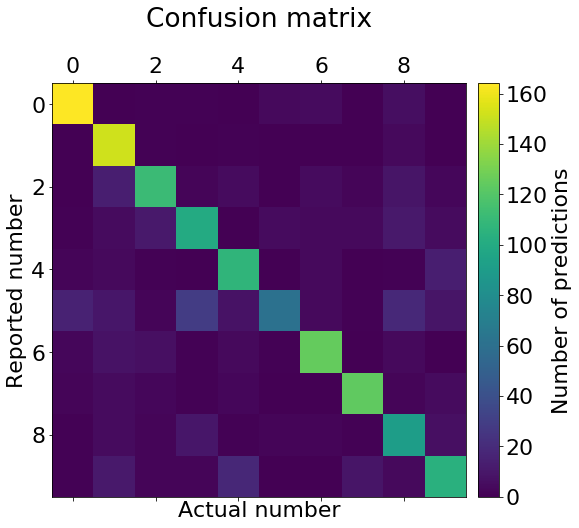

In [232]:
fig_conn, ax1 = plt.subplots(1, 1,figsize=(8,8), dpi=800)
    

ff_conn_ax = ax1.matshow(confusion_matrix)

ax1.set_title("Confusion matrix\n")
ax1.set_xlabel("Actual number")
ax1.set_ylabel("Reported number")

divider = make_axes_locatable(plt.gca())
cax = divider.append_axes("right", "5%", pad="3%")
cbar = plt.colorbar(ff_conn_ax, cax=cax)
cbar.set_label("Number of predictions")

# divider = make_axes_locatable(plt.gca())
# cax = divider.append_axes("right", "5%", pad="3%")
# cbar = plt.colorbar(i, cax=cax)
# cbar.set_label("Number of hits", fontsize=14)

plt.savefig("mnist_confusion_matrix.png", dpi=800)

In [233]:
accuracy = np.trace(confusion_matrix) / np.sum(confusion_matrix)
print accuracy
recall = np.trace(confusion_matrix) / np.sum(confusion_matrix)
print recall

0.76
0.76


In [234]:
from sklearn.metrics import classification_report

In [235]:
print classification_report(testing_data['testing_numbers'], what_network_thinks)

             precision    recall  f1-score   support

          0       0.86      0.91      0.88       181
          1       0.71      0.96      0.82       158
          2       0.79      0.74      0.76       152
          3       0.68      0.68      0.68       146
          4       0.73      0.80      0.76       133
          5       0.84      0.38      0.53       159
          6       0.84      0.82      0.83       153
          7       0.88      0.86      0.87       145
          8       0.60      0.75      0.67       122
          9       0.71      0.69      0.70       151

avg / total       0.77      0.76      0.75      1500

